Загрузите датасет `digits` с помощью функции `load_digits` из `sklearn.datasets` и подготовьте матрицу признаков `X` и ответы на обучающей выборке `y` (вам потребуются поля `data` и `target` в объекте, который возвращает `load_digits`).

In [1]:
from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

## Задание 1\.

Для оценки качества далее нужно будет использовать `cross_val_score` из `sklearn.cross_validation` с параметром `cv=10`. Эта функция реализует k-fold cross validation c `k` равным значению параметра `cv`. Мы предлагаем использовать `k=10`, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и `k=5`. Функция `cross_val_score` будет возвращать `numpy.ndarray`, в котором будет `k` чисел - качество в каждом из `k` экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод `.mean()` у массива, который возвращает `cross_val_score`.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с `cross_val_score` несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление `cross_val_score` - можете попробовать использовать параметр `n_jobs`, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы `cross_val_score` при задании `n_jobs` отличным от `1`. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

Создайте `DecisionTreeClassifier` с настройками по умолчанию и измерьте качество его работы с помощью `cross_val_score`. Эта величина и будет ответом в пункте `1`.

In [2]:
from sklearn import model_selection, tree

In [3]:
dt_model = tree.DecisionTreeClassifier()
scores = model_selection.cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print (f'Accuracy score: {scores.mean()}')

Accuracy score: 0.8274705152079453


## Задание 2\. 

Воспользуйтесь `BaggingClassifier` из `sklearn.ensemble`, чтобы обучить бэггинг над `DecisionTreeClassifier`. Используйте в `BaggingClassifier` параметры по умолчанию, задав только количество деревьев равным `100`.

Качество классификации новой модели – ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [4]:
from sklearn import ensemble, metrics

In [5]:
bagging = ensemble.BaggingClassifier(base_estimator=dt_model, n_estimators=100, random_state=0)
scores = model_selection.cross_val_score(bagging, X, y, cv=10, scoring='accuracy', verbose=True)
print (f'Accuracy score: {scores.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 0.927048417132216


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.9s finished


## Задание 3\. 
Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt d$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. 

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [11]:
def sqrt_propotion(x):
    return int(x ** 0.5)

In [12]:
bagging = ensemble.BaggingClassifier(base_estimator=dt_model, n_estimators=100, max_features=sqrt_propotion(X.shape[1]), random_state=0)
scores = model_selection.cross_val_score(bagging, X, y, cv=10, scoring='accuracy', verbose=True)
print (f'Accuracy score: {scores.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 0.9293389199255122


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.8s finished


## Задание 4\. 
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в `BaggingClassifier` и добавить его в `DecisionTreeClassifier`. Какой параметр за это отвечает, можно понять из документации `sklearn`, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt d$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [13]:
dt_model = tree.DecisionTreeClassifier(max_features=sqrt_propotion(X.shape[1]))
bagging = ensemble.BaggingClassifier(base_estimator=dt_model, n_estimators=100, random_state=0)
scores = model_selection.cross_val_score(bagging, X, y, cv=10, scoring='accuracy', verbose=True)
print (f'Accuracy score: {scores.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 0.9460117939168218


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.0s finished


## Задание 5\. 

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из `sklearn.ensemble`. 

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [14]:
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=0)
scores = model_selection.cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', verbose=True)
print (f'Accuracy score: {scores.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score: 0.9476939788950961


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.6s finished


In [18]:
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [16]:
def accuracy_dynamics(n_esimators_list, max_features_list):
    plt.figure()
    
    plt.subplot(1, 2, 1)
    scores_1 = []
    for n_estimators in tqdm(n_esimators_list):
        rf_model = ensemble.RandomForestClassifier(n_estimators=n_estimators)
        scores_1.append(
            model_selection.cross_val_score(rf_model, X, y, cv=10, scoring='accuracy').mean()
        )
    plt.plot(n_esimators_list, scores_1)
    plt.xlabel('n_esimators')
    plt.ylabel('accuracy')
    
    plt.subplot(1, 2, 2)
    scores_2 = []
    for max_features in tqdm(max_features_list):
        rf_model = ensemble.RandomForestClassifier(n_estimators=100, max_features=max_features)
        scores_2.append(
            model_selection.cross_val_score(rf_model, X, y, cv=10, scoring='accuracy').mean()
        )
    plt.plot(max_features_list, scores_2)
    plt.xlabel('max_features')
    plt.ylabel('accuracy')
    
    plt.tight_layout()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.85s/it]


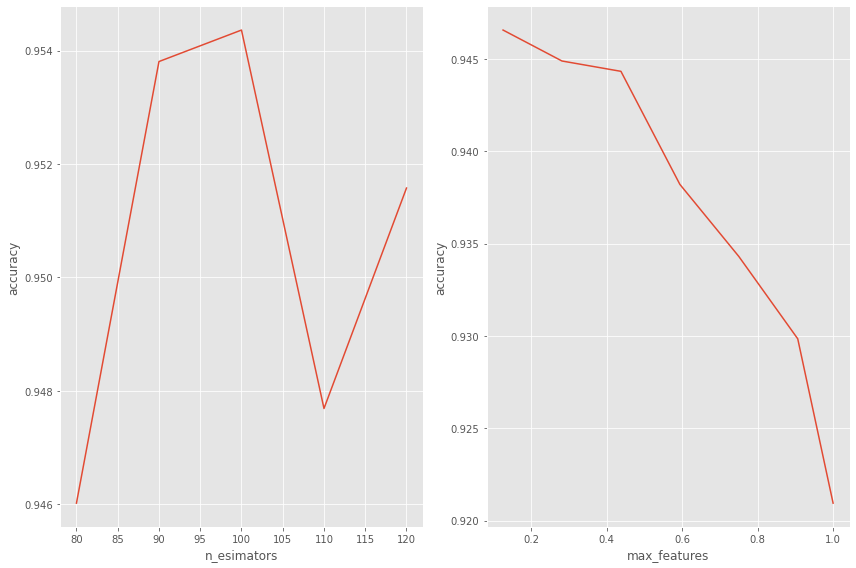

In [19]:
n_esimators_list = [i for i in range(80, 121, 10)]
max_features_list = [i / X.shape[1] for i in range(int(X.shape[1] ** 0.5), X.shape[1], 10)] + [1.0]
accuracy_dynamics(n_esimators_list, max_features_list)